In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_excel('/Users/dr/Documents/GitHub/KMeans and KNN/-Stock-classification-with-K-means-and-KNN/RTY as of Oct 24 20241_rgdu1co5.xlsx')

In [3]:
data.head()

,Ticker,Name,BEst Est PEG Ratio Curr Year\n,Market Cap\n
0,RUN,Sunrun Inc,257.870370,3096024832
1,KRG,Kite Realty Group Trust,174.695571,5735470080
2,NTST,NETSTREIT Corp,164.779809,1236495360
3,ROIC,Retail Opportunity Investments Corp,120.532319,2044230528
4,HOFT,Hooker Furnishings Corp,113.714286,175383728


In [4]:
data.columns

Index(['Ticker', 'Name', 'BEst Est PEG Ratio Curr Year\n', 'Market Cap\n'], dtype='object')

In [13]:
data.shape

(1972, 5)

In [5]:
X = data[['Market Cap\n', 'BEst Est PEG Ratio Curr Year\n']]

In [6]:
X.head()

,Market Cap\n,BEst Est PEG Ratio Curr Year\n
0,3096024832,257.870370
1,5735470080,174.695571
2,1236495360,164.779809
3,2044230528,120.532319
4,175383728,113.714286


In [7]:
#Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 0.83385654, 27.87522876],
       [ 2.33799678, 18.849543  ],
       [-0.22583321, 17.7735374 ],
       ...,
       [-0.831404  , -0.10748883],
       [-0.87182266, -0.10748883],
       [-0.5352229 , -0.10748883]])

In [9]:
#K-means Clustering
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [10]:
data['Cluster'] = clusters

In [11]:
data.head()

,Ticker,Name,BEst Est PEG Ratio Curr Year\n,Market Cap\n,Cluster
0,RUN,Sunrun Inc,257.870370,3096024832,4
1,KRG,Kite Realty Group Trust,174.695571,5735470080,6
2,NTST,NETSTREIT Corp,164.779809,1236495360,6
3,ROIC,Retail Opportunity Investments Corp,120.532319,2044230528,2
4,HOFT,Hooker Furnishings Corp,113.714286,175383728,2


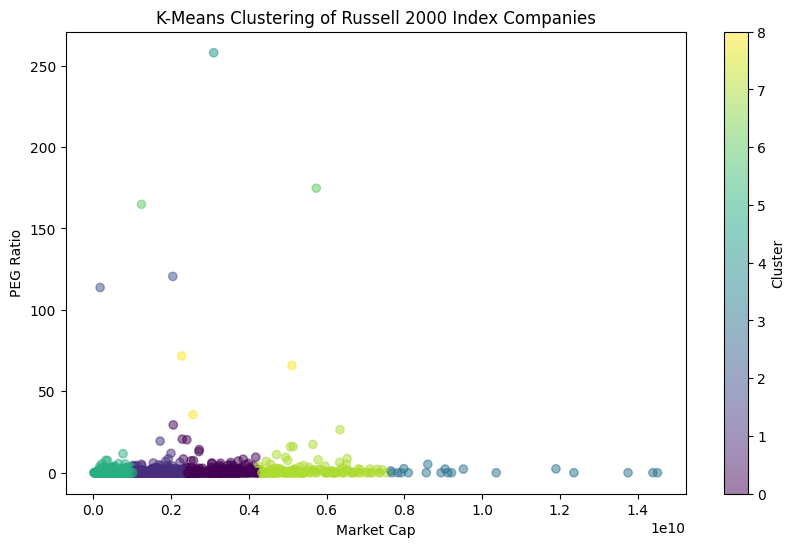

In [15]:
#Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(data['Market Cap\n'], data['BEst Est PEG Ratio Curr Year\n'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Market Cap')
plt.ylabel('PEG Ratio')
plt.title('K-Means Clustering of Russell 2000 Index Companies')
plt.colorbar(label='Cluster')
plt.show()


In [31]:
#MorngingStar Style Box

#Size Categories based on market cap
bins_size = [0, 1e9, 5e9, float('inf')]
labels_size = ['Small', 'Mid', 'Large']
data['Size'] = pd.cut(data['Market Cap\n'], bins=bins_size, labels=labels_size)

#Style categories based on PEG ratio
bins_style = [-float('inf'), 0.5, 1.5, float('inf')]
labels_style = ['Value', 'Blend', 'Growth']
data['Style'] = pd.cut(data['BEst Est PEG Ratio Curr Year\n'], bins=bins_style, labels=labels_style)

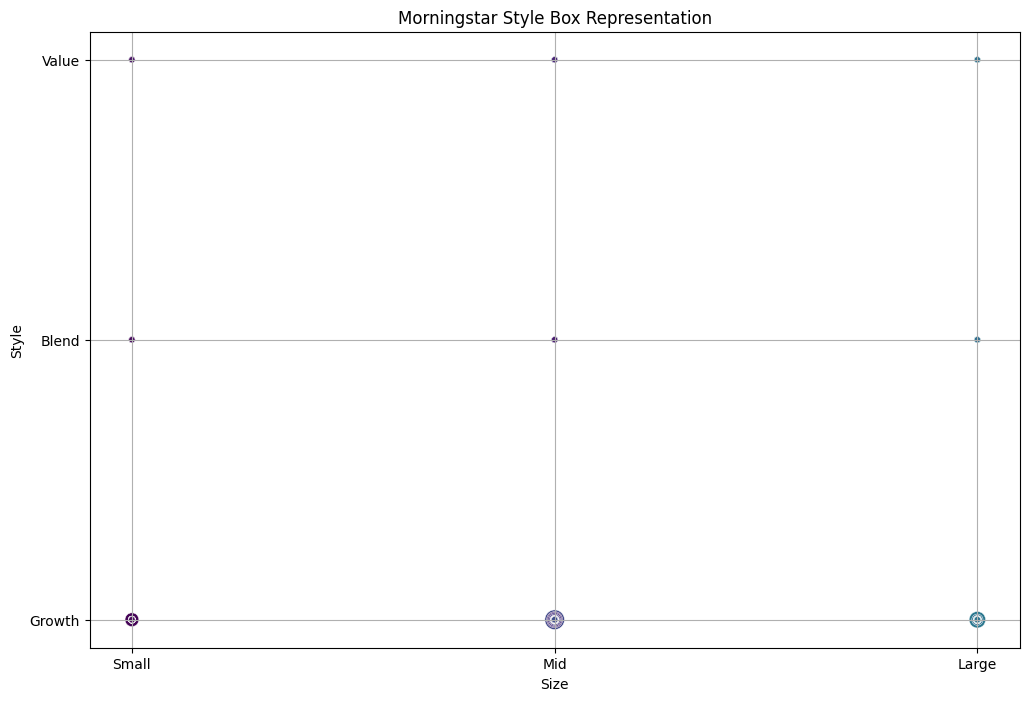

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Size', y='Style', hue='Market Cap\n', size='BEst Est PEG Ratio Curr Year\n', 
                sizes=(20,200), palette='viridis', legend=None)
plt.title('Morningstar Style Box Representation')
plt.xlabel('Size')
plt.ylabel('Style')
plt.grid(True)
plt.show()

In [34]:
#KNN
X_train = X_scaled
y_train = data['Cluster']

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
new_stock = [[2.5e9, 15]] #Market Cap = $2.5 billion and PEG 15

new_stock_scaled = scaler.fit_transform(new_stock)

In [39]:
predicted_cluster = knn.predict(new_stock_scaled)

print(f'The new stock belongs to the cluster: {predicted_cluster[0]}')

The new stock belongs to the cluster: 1
